In [17]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler 
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder


In [18]:
train_df = pd.read_csv("./databases/train.csv")
test_df =  pd.read_csv("./databases/test.csv")

In [19]:
train_df_null = train_df.isnull()
print(train_df_null.sum())

Id                                         0
date                                       0
Lagging_Current_Reactive.Power_kVarh       0
Leading_Current_Reactive_Power_kVarh     119
CO2(tCO2)                                  0
Lagging_Current_Power_Factor               0
Leading_Current_Power_Factor              76
NSM                                        0
WeekStatus                              1774
Day_of_week                             1774
Load_Type                                  0
Usage_kWh                                  0
dtype: int64


In [20]:
test_df_null = test_df.isnull()
print(test_df_null.sum())

Id                                        0
date                                      0
Lagging_Current_Reactive.Power_kVarh      0
Leading_Current_Reactive_Power_kVarh      0
CO2(tCO2)                                 0
Lagging_Current_Power_Factor              0
Leading_Current_Power_Factor              0
NSM                                       0
WeekStatus                              692
Day_of_week                             692
Load_Type                                 0
dtype: int64


In [21]:
imputer_mean = SimpleImputer(missing_values=np.nan, strategy="mean")
train_df['Leading_Current_Reactive_Power_kVarh'] = imputer_mean.fit_transform(train_df[['Leading_Current_Reactive_Power_kVarh']])
train_df['Leading_Current_Power_Factor'] = imputer_mean.fit_transform(train_df[['Leading_Current_Power_Factor']])

In [22]:
def weekStatus(day):
    if day in ['Saturday','Sunday']:
        return 'Weekend'
    else:
        return 'Weekday'
    
train_df ['WeekStatus'] = train_df['Day_of_week'].apply(weekStatus)   
test_df ['WeekStatus'] = test_df['Day_of_week'].apply(weekStatus)   

In [23]:
train_df['date'] = pd.to_datetime(train_df['date'], format='%d/%m/%Y %H:%M')
test_df['date'] = pd.to_datetime(test_df['date'], format='%d/%m/%Y %H:%M')

train_df['Day_of_week'] = train_df['date'].dt.day_name()
test_df['Day_of_week'] = test_df['date'].dt.day_name()

In [24]:
train_df_null = train_df.isnull()
print(train_df_null.sum())

Id                                      0
date                                    0
Lagging_Current_Reactive.Power_kVarh    0
Leading_Current_Reactive_Power_kVarh    0
CO2(tCO2)                               0
Lagging_Current_Power_Factor            0
Leading_Current_Power_Factor            0
NSM                                     0
WeekStatus                              0
Day_of_week                             0
Load_Type                               0
Usage_kWh                               0
dtype: int64


In [25]:
test_df_null = test_df.isnull()
print(test_df_null.sum())

Id                                      0
date                                    0
Lagging_Current_Reactive.Power_kVarh    0
Leading_Current_Reactive_Power_kVarh    0
CO2(tCO2)                               0
Lagging_Current_Power_Factor            0
Leading_Current_Power_Factor            0
NSM                                     0
WeekStatus                              0
Day_of_week                             0
Load_Type                               0
dtype: int64


In [26]:
categorical_features = ['WeekStatus', 'Day_of_week', 'Load_Type']

for feature in categorical_features:
    print(train_df[feature].unique())

print()

for feature in categorical_features:
    print(test_df[feature].unique())
    

['Weekday' 'Weekend']
['Monday' 'Tuesday' 'Wednesday' 'Thursday' 'Friday' 'Saturday' 'Sunday']
['Light_Load' 'Medium_Load' 'Maximum_Load']

['Weekday' 'Weekend']
['Friday' 'Saturday' 'Sunday' 'Monday' 'Tuesday' 'Wednesday' 'Thursday']
['Maximum_Load' 'Medium_Load' 'Light_Load']


In [27]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

def encode_and_scale_features(train_df, test_df, categorical_features, target_column):
    label_encoders = {}
    
    # Encode categorical features
    for feature in categorical_features:
        unique_values = set(train_df[feature].unique()) | set(test_df[feature].unique())
        label_encoder = LabelEncoder()
        label_encoder.fit(list(unique_values))
        train_df[feature] = label_encoder.transform(train_df[feature])
        test_df[feature] = label_encoder.transform(test_df[feature])
        label_encoders[feature] = label_encoder

    
    # Identify numeric features (excluding target column)
    numeric_features = [col for col in train_df.select_dtypes(include=['float64', 'int64']).columns
                        if col not in categorical_features and col != target_column]
    
    # Scale numeric features
    scaler = MinMaxScaler()
    scaler.fit(train_df[numeric_features])  # Fit scaler on training data
    
    train_df[numeric_features] = scaler.transform(train_df[numeric_features])
    test_df[numeric_features] = scaler.transform(test_df[numeric_features])
    
    return train_df, test_df, label_encoders, scaler

# Example usage
target_column = 'Usage_kWh'
train_df_encoded_scaled, test_df_encoded_scaled, label_encoders, scaler = encode_and_scale_features(train_df, test_df, categorical_features, target_column)

# Check the encoded and scaled features

# Check the encoded and scaled features for train_df_encoded_scaled
for feature in categorical_features:
    print(train_df_encoded_scaled[feature].unique())

print()

# Check the encoded and scaled features for test_df_encoded_scaled
for feature in categorical_features:
    print(test_df_encoded_scaled[feature].unique())



[0 1]
[1 5 6 4 0 2 3]
[0 2 1]

[0 1]
[0 2 3 1 5 6 4]
[1 2 0]


In [28]:
train_df_encoded_scaled

,Id,date,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type,Usage_kWh
0,0.000000,2018-01-01 00:15:00,0.030441,0.0,0.000000,0.575167,1.0,0.010526,0,1,0,3.17
1,0.000036,2018-01-01 00:30:00,0.046022,0.0,0.000000,0.473042,1.0,0.021053,0,1,0,4.00
2,0.000071,2018-01-01 00:45:00,0.033846,0.0,0.000000,0.528703,1.0,0.031579,0,1,0,3.24
3,0.000107,2018-01-01 01:00:00,0.036735,0.0,0.000000,0.493974,1.0,0.042105,0,1,0,3.31
4,0.000143,2018-01-01 01:15:00,0.046435,0.0,0.000000,0.440533,1.0,0.052632,0,1,0,3.82
...,...,...,...,...,...,...,...,...,...,...,...,...
27994,0.999857,2018-10-19 14:45:00,0.336601,0.0,0.285714,0.774025,1.0,0.621053,0,0,1,54.36
27995,0.999893,2018-10-19 15:00:00,0.365907,0.0,0.428571,0.758325,1.0,0.631579,0,0,1,56.63
27996,0.999929,2018-10-19 15:15:00,0.319059,0.0,0.428571,0.835553,1.0,0.642105,0,0,1,62.50
27997,0.999964,2018-10-19 15:30:00,0.600351,0.0,0.571429,0.744529,1.0,0.652632,0,0,1,89.68


In [29]:
test_df_encoded_scaled

,Id,date,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type
0,1.000036,2018-10-19 16:00:00,0.657105,0.000000,0.714286,0.749286,1.000000,0.673684,0,0,1
1,1.000071,2018-10-19 16:15:00,0.559075,0.000000,0.571429,0.766572,1.000000,0.684211,0,0,1
2,1.000107,2018-10-19 16:30:00,0.567950,0.000000,0.571429,0.766572,1.000000,0.694737,0,0,1
3,1.000143,2018-10-19 16:45:00,0.375606,0.000000,0.428571,0.748335,1.000000,0.705263,0,0,1
4,1.000179,2018-10-19 17:00:00,0.362914,0.000000,0.428571,0.763400,1.000000,0.715789,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
7036,1.251339,2018-12-31 23:00:00,0.050150,0.000000,0.000000,0.398985,1.000000,0.968421,0,1,0
7037,1.251375,2018-12-31 23:15:00,0.038593,0.000000,0.000000,0.535522,1.000000,0.978947,0,1,0
7038,1.251411,2018-12-31 23:30:00,0.032711,0.002522,0.000000,0.629242,0.999771,0.989474,0,1,0
7039,1.251447,2018-12-31 23:45:00,0.031576,0.003963,0.000000,0.646686,0.999543,1.000000,0,1,0


In [30]:
train_df_encoded_scaled['month'] = train_df_encoded_scaled['date'].dt.month
train_df_encoded_scaled['day'] = train_df_encoded_scaled['date'].dt.day
train_df_encoded_scaled['hour'] = train_df_encoded_scaled['date'].dt.hour
train_df_encoded_scaled['minute'] = train_df_encoded_scaled['date'].dt.minute
train_df_encoded_scaled = train_df_encoded_scaled.drop(columns=['date'])
train_df_encoded_scaled = train_df_encoded_scaled.drop(columns=['Id'])

test_df_encoded_scaled['month'] = test_df_encoded_scaled['date'].dt.month
test_df_encoded_scaled['day'] = test_df_encoded_scaled['date'].dt.day
test_df_encoded_scaled['hour'] = test_df_encoded_scaled['date'].dt.hour
test_df_encoded_scaled['minute'] = test_df_encoded_scaled['date'].dt.minute
test_df_encoded_scaled = test_df_encoded_scaled.drop(columns=['date'])
test_df_encoded_scaled = test_df_encoded_scaled.drop(columns=['Id'])

In [31]:
train_df_encoded_scaled

,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type,Usage_kWh,month,day,hour,minute
0,0.030441,0.0,0.000000,0.575167,1.0,0.010526,0,1,0,3.17,1,1,0,15
1,0.046022,0.0,0.000000,0.473042,1.0,0.021053,0,1,0,4.00,1,1,0,30
2,0.033846,0.0,0.000000,0.528703,1.0,0.031579,0,1,0,3.24,1,1,0,45
3,0.036735,0.0,0.000000,0.493974,1.0,0.042105,0,1,0,3.31,1,1,1,0
4,0.046435,0.0,0.000000,0.440533,1.0,0.052632,0,1,0,3.82,1,1,1,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27994,0.336601,0.0,0.285714,0.774025,1.0,0.621053,0,0,1,54.36,10,19,14,45
27995,0.365907,0.0,0.428571,0.758325,1.0,0.631579,0,0,1,56.63,10,19,15,0
27996,0.319059,0.0,0.428571,0.835553,1.0,0.642105,0,0,1,62.50,10,19,15,15
27997,0.600351,0.0,0.571429,0.744529,1.0,0.652632,0,0,1,89.68,10,19,15,30


In [32]:
test_df_encoded_scaled

,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type,month,day,hour,minute
0,0.657105,0.000000,0.714286,0.749286,1.000000,0.673684,0,0,1,10,19,16,0
1,0.559075,0.000000,0.571429,0.766572,1.000000,0.684211,0,0,1,10,19,16,15
2,0.567950,0.000000,0.571429,0.766572,1.000000,0.694737,0,0,1,10,19,16,30
3,0.375606,0.000000,0.428571,0.748335,1.000000,0.705263,0,0,1,10,19,16,45
4,0.362914,0.000000,0.428571,0.763400,1.000000,0.715789,0,0,1,10,19,17,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7036,0.050150,0.000000,0.000000,0.398985,1.000000,0.968421,0,1,0,12,31,23,0
7037,0.038593,0.000000,0.000000,0.535522,1.000000,0.978947,0,1,0,12,31,23,15
7038,0.032711,0.002522,0.000000,0.629242,0.999771,0.989474,0,1,0,12,31,23,30
7039,0.031576,0.003963,0.000000,0.646686,0.999543,1.000000,0,1,0,12,31,23,45


In [33]:
# Calculate z-scores for each feature in the training dataset
z_scores_train = (train_df_encoded_scaled - train_df_encoded_scaled.mean()) / train_df_encoded_scaled.std()

# Define a threshold for outlier detection (usually |z-score| > 3 is considered an outlier)
threshold = 3

# Find outliers
outliers_train = np.abs(z_scores_train) > threshold

print(outliers_train.sum())

Lagging_Current_Reactive.Power_kVarh    313
Leading_Current_Reactive_Power_kVarh    374
CO2(tCO2)                                22
Lagging_Current_Power_Factor              0
Leading_Current_Power_Factor              0
NSM                                       0
WeekStatus                                0
Day_of_week                               0
Load_Type                                 0
Usage_kWh                               144
month                                     0
day                                       0
hour                                      0
minute                                    0
dtype: int64


In [34]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

# Define your target column
target_column = 'Usage_kWh'

# Split the data into features (X) and target (y)
X_train = train_df_encoded_scaled.drop(columns=[target_column])
y_train = train_df_encoded_scaled[target_column]

X_test = test_df_encoded_scaled  # Features of the test dataset

from sklearn.model_selection import cross_val_score

# Define the degree of polynomial features
degree = 2  # Change this to your desired degree

# Create a pipeline with PolynomialFeatures and LinearRegression
pipeline = make_pipeline(PolynomialFeatures(degree), LinearRegression())

# Calculate cross-validation scores
cv_scores = cross_val_score(pipeline, X_train, y_train, cv=5)

# Print cross-validation scores
print(f"Cross-Validation Scores (Degree {degree}):", cv_scores)

# Calculate mean of cross-validation scores
cv_mean_score = cv_scores.mean()

# Print mean cross-validation scores
print(f"Mean Cross-Validation Score (Degree {degree}):", cv_mean_score)

Cross-Validation Scores (Degree 2): [0.99030427 0.99526942 0.99651139 0.99664378 0.99623589]
Mean Cross-Validation Score (Degree 2): 0.994992951058815


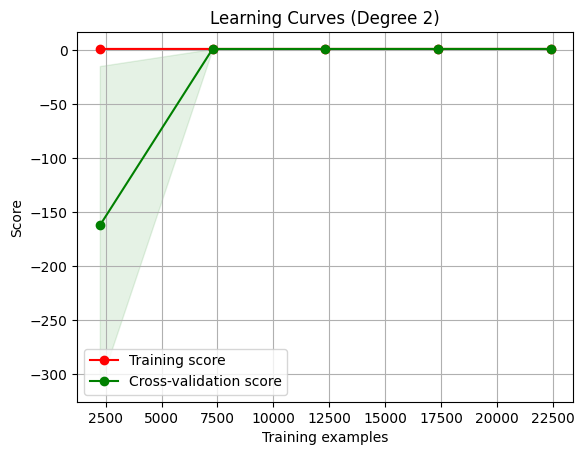

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

# Define a function to plot learning curves
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

# Set the title for the learning curve plot
title = f"Learning Curves (Degree {degree})"

# Plot learning curves
plot_learning_curve(pipeline, title, X_train, y_train, cv=5, n_jobs=-1)

plt.show()
